In [ ]:
!pip install MiniSom



  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=8165b594428ca81696d5935a26ae599e00013ec9ca186a6510524d71d1aa6996
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built MiniSom


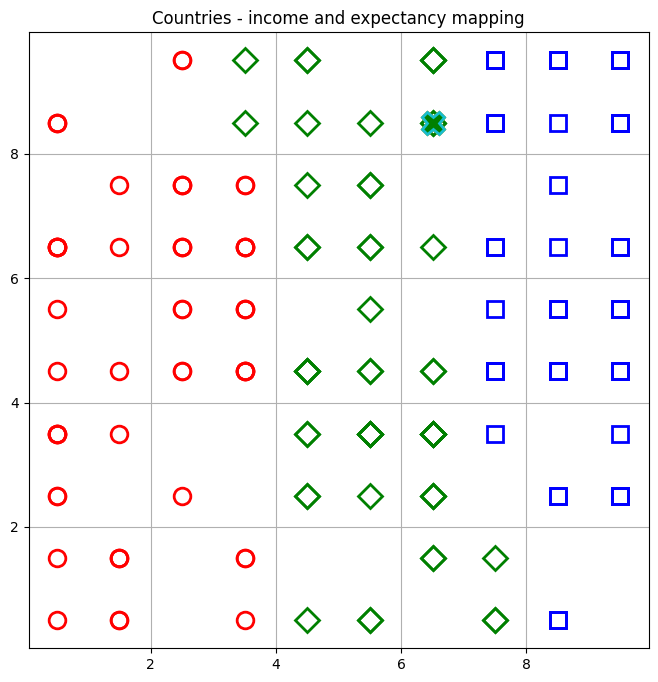

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from minisom import MiniSom

data = pd.read_csv('/content/Country-data.csv')
countries = data['country'].values
data = data.drop('country', axis=1).to_numpy()
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
som = MiniSom(x=10, y=10, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data_scaled)
som.train_random(data_scaled, 1000)
win_map = np.array([som.winner(d) for d in data_scaled])
win_map_flat = np.array([x * 10 + y for x, y in win_map])
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(win_map_flat.reshape(-1, 1))
plt.figure(figsize=(8, 8))
markers = ['o', 's', 'D']
colors = ['r', 'b', 'g']
for i, x in enumerate(data_scaled):
    winner = som.winner(x)
    plt.plot(winner[0] + 0.5, winner[1] + 0.5, markers[clusters[i]],
             markerfacecolor='None', markeredgecolor=colors[clusters[i]],
             markersize=12, markeredgewidth=2)
for i, centroid in enumerate(kmeans.cluster_centers_):
    plt.plot(som.winner(centroid)[0] + 0.5, som.winner(centroid)[1] + 0.5, 'X',
             markerfacecolor=colors[i], markeredgewidth=2, markersize=16)
plt.title('Countries - income and expectancy mapping')
plt.grid()
plt.show()
